In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
df = pd.read_csv('AQI_HaNoi_Final.csv')
df.head()

,date,pm25,pm10,o3,no2,so2,co,year,number_days,AQI_pm25,AQI_pm10,AQI_o3,AQI_no2,AQI_so2,AQI_co,AQI
0,2024-03-01,46.0,42.0,12.0,3.0,8.0,6.0,2024,1764,92.000000,42.0,3.7500,1.5,3.2,30.0,92.000000
1,2024-02-29,55.0,27.0,11.0,3.0,8.0,5.0,2024,1763,108.333333,27.0,3.4375,1.5,3.2,25.0,108.333333
2,2024-02-28,86.0,29.0,9.0,2.0,8.0,4.0,2024,1762,154.285714,29.0,2.8125,1.0,3.2,20.0,154.285714
3,2024-02-27,47.0,43.0,5.0,3.0,8.0,6.0,2024,1761,94.000000,43.0,1.5625,1.5,3.2,30.0,94.000000
4,2024-02-26,62.0,26.0,6.0,3.0,8.0,4.0,2024,1760,120.000000,26.0,1.8750,1.5,3.2,20.0,120.000000


In [3]:
cols = ['number_days', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'AQI']

In [4]:
df = df[cols]
df.head()

,number_days,pm25,pm10,o3,no2,so2,co,AQI
0,1764,46.0,42.0,12.0,3.0,8.0,6.0,92.000000
1,1763,55.0,27.0,11.0,3.0,8.0,5.0,108.333333
2,1762,86.0,29.0,9.0,2.0,8.0,4.0,154.285714
3,1761,47.0,43.0,5.0,3.0,8.0,6.0,94.000000
4,1760,62.0,26.0,6.0,3.0,8.0,4.0,120.000000


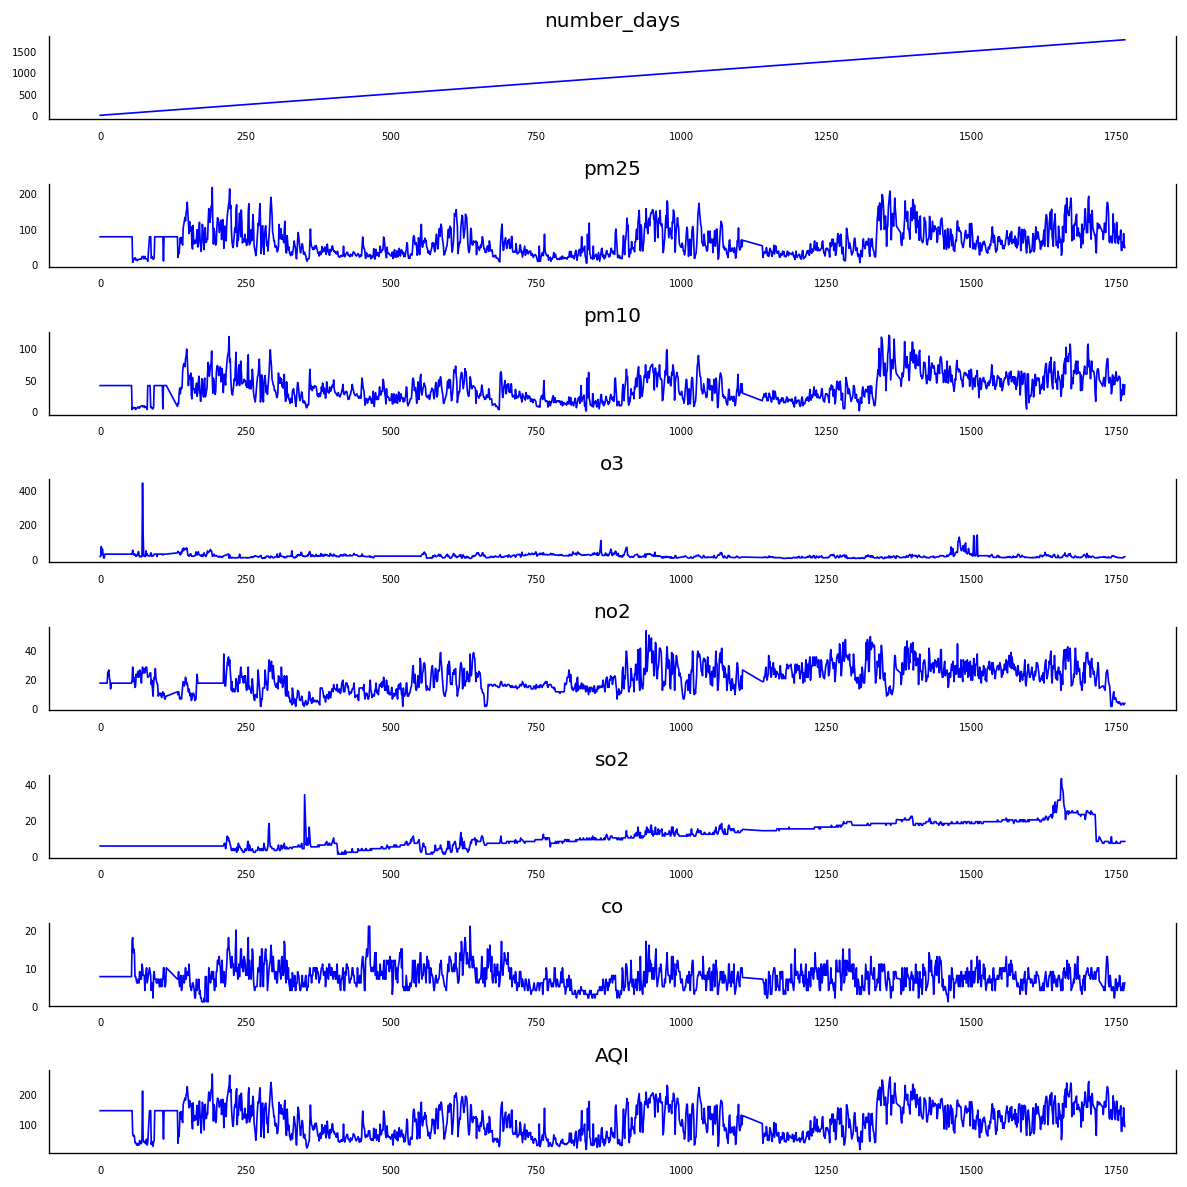

In [5]:
fig, axes = plt.subplots(nrows=8, ncols=1, dpi=120, figsize=(10,10))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(df.number_days, data, color='blue', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### Cointegration Test ###

In [6]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
number_days ::  673.14    > 143.6691  =>   True
pm25   ::  431.6     > 111.7797  =>   True
pm10   ::  288.13    > 83.9383   =>   True
o3     ::  200.99    > 60.0627   =>   True
no2    ::  119.1     > 40.1749   =>   True
so2    ::  75.27     > 24.2761   =>   True
co     ::  39.0      > 12.3212   =>   True
AQI    ::  8.68      > 4.1296    =>   True


### Chia tập train, test ###

In [21]:
df = df.sort_values(by='number_days', ascending=True)
df = df.reset_index()
df

,index,number_days,pm25,pm10,o3,no2,so2,co,AQI
0,1694,0,76.836879,41.098592,13.0,16.944444,5.464286,7.670807,144.728132
1,1693,1,76.836879,41.098592,17.0,16.944444,5.464286,7.670807,144.728132
2,1692,2,76.836879,41.098592,71.0,16.944444,5.464286,7.670807,144.728132
3,1691,3,76.836879,41.098592,24.0,16.944444,5.464286,7.670807,144.728132
4,1690,4,76.836879,41.098592,56.0,16.944444,5.464286,7.670807,144.728132
...,...,...,...,...,...,...,...,...,...
1690,4,1760,62.000000,26.000000,6.0,3.000000,8.000000,4.000000,120.000000
1691,3,1761,47.000000,43.000000,5.0,3.000000,8.000000,6.000000,94.000000
1692,2,1762,86.000000,29.000000,9.0,2.000000,8.000000,4.000000,154.285714
1693,1,1763,55.000000,27.000000,11.0,3.000000,8.000000,5.000000,108.333333


In [61]:
# df = df.drop(columns=['index'], axis=1)
df

,number_days,pm25,pm10,o3,no2,so2,co,AQI
0,0,76.836879,41.098592,13.0,16.944444,5.464286,7.670807,144.728132
1,1,76.836879,41.098592,17.0,16.944444,5.464286,7.670807,144.728132
2,2,76.836879,41.098592,71.0,16.944444,5.464286,7.670807,144.728132
3,3,76.836879,41.098592,24.0,16.944444,5.464286,7.670807,144.728132
4,4,76.836879,41.098592,56.0,16.944444,5.464286,7.670807,144.728132
...,...,...,...,...,...,...,...,...
1690,1760,62.000000,26.000000,6.0,3.000000,8.000000,4.000000,120.000000
1691,1761,47.000000,43.000000,5.0,3.000000,8.000000,6.000000,94.000000
1692,1762,86.000000,29.000000,9.0,2.000000,8.000000,4.000000,154.285714
1693,1763,55.000000,27.000000,11.0,3.000000,8.000000,5.000000,108.333333


In [62]:
cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'AQI']
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR  

time_series = df[cols]
train_data = time_series[:int(0.7*len(time_series))]
test_data = time_series[int(0.7*len(time_series)):]

In [63]:
train_data

,pm25,pm10,o3,no2,so2,co,AQI
0,76.836879,41.098592,13.0,16.944444,5.464286,7.670807,144.728132
1,76.836879,41.098592,17.0,16.944444,5.464286,7.670807,144.728132
2,76.836879,41.098592,71.0,16.944444,5.464286,7.670807,144.728132
3,76.836879,41.098592,24.0,16.944444,5.464286,7.670807,144.728132
4,76.836879,41.098592,56.0,16.944444,5.464286,7.670807,144.728132
...,...,...,...,...,...,...,...
1181,37.000000,21.000000,10.0,21.000000,16.000000,4.000000,74.000000
1182,41.000000,23.000000,11.0,22.000000,15.000000,4.000000,82.000000
1183,42.000000,25.000000,14.0,33.000000,16.000000,11.000000,84.000000
1184,43.000000,36.000000,17.0,32.000000,16.000000,11.000000,86.000000


### Check for Stationarity and Make the Time Series Stationary ###

In [64]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [65]:
# ADF Test on each column
for name, column in train_data.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "pm25" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9508
 No. Lags Chosen       = 20
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0398. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "pm10" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.4346
 No. Lags Chosen       = 20
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0098. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "o3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    =

In [66]:
# cols = ['pm25', 'pm10', 'o3', 'no2', 'co', 'AQI']
# train_data = train_data[cols]
# test_data = test_data[cols]

In [67]:
import warnings
warnings.filterwarnings("ignore")

### 10. Xây dựng mô hình VAR ###

In [68]:
model = VAR(train_data)

In [69]:
# Tìm Lag Order
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,30.95,30.98,2.772e+13,30.96
1,23.66,23.90,1.886e+10,23.75
2,22.59,23.05*,6.489e+09,22.76*
3,22.53,23.19,6.089e+09,22.78
4,22.51,23.38,5.952e+09,22.84
5,22.52,23.61,6.041e+09,22.93
6,22.49*,23.79,5.869e+09*,22.98
7,22.50,24.01,5.898e+09,23.07
8,22.50,24.22,5.916e+09,23.15
9,22.50,24.44,5.939e+09,23.23


In [70]:
# lag_order = 9
fitted_model = model.fit(9)
lag_order = fitted_model.k_ar
predictions = fitted_model.forecast(train_data.values[-lag_order:], steps=len(test_data))

### 11. Biểu diễn đồ thị ###

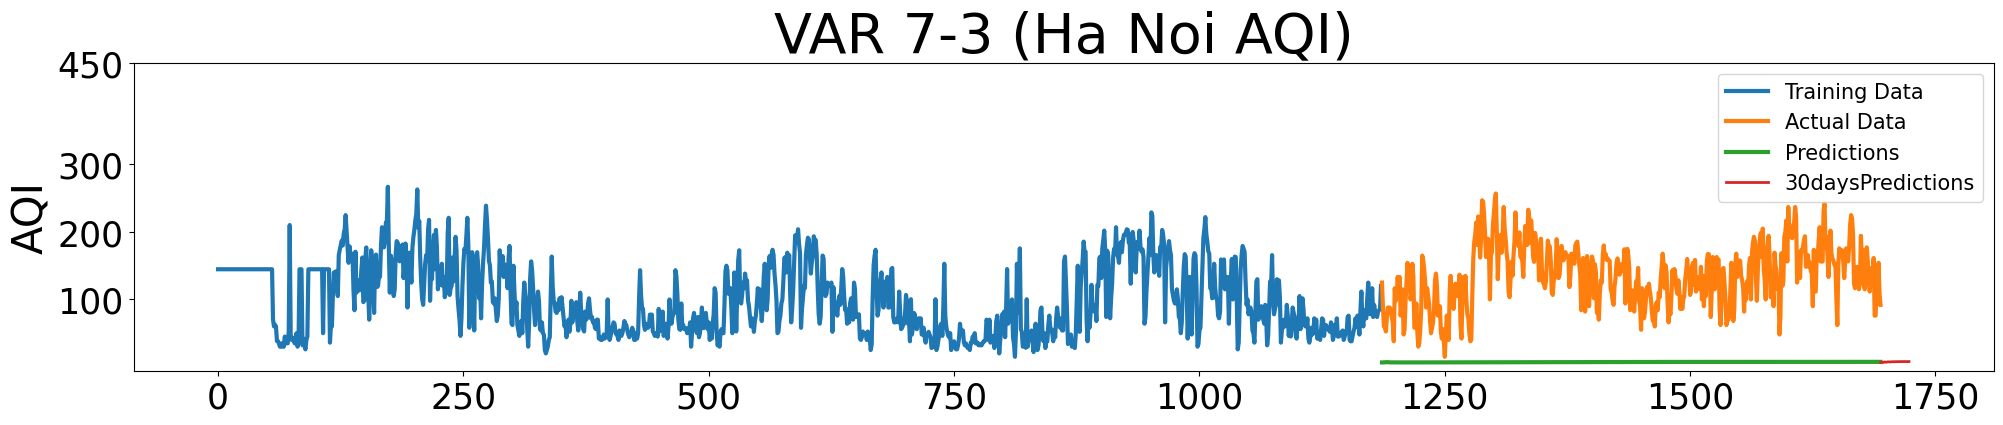

In [71]:
plt.figure(figsize=(24, 4))
plt.plot(train_data.index, train_data.AQI, label='Training Data', linewidth=3)
plt.plot(test_data.index, test_data.AQI, label='Actual Data', linewidth=3)
plt.plot(test_data.index, predictions[:,5], label='Predictions', linewidth=3)  

# Dự đoán 30 ngày tiếp theo
predictions_future = fitted_model.forecast(test_data.values[-lag_order:], steps=30)
prediect_data_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+29, step=1)
plt.plot(prediect_data_index, predictions_future[:,5], label='30daysPredictions', linewidth=2)

plt.title('VAR 7-3 (Ha Noi AQI)', fontsize=40)
# plt.xlabel('Date', fontsize=30)
plt.ylabel('AQI', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks([100, 200, 300, 450], fontsize=25)
plt.legend(fontsize=15)
plt.show()